In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata

In [158]:
df = pd.read_excel("../../crawl_data/data/data_tv.xlsx")

> Số dòng và số cột

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 163 entries, id to badges_new_4_icon_width
dtypes: bool(16), float64(36), int64(51), object(60)
memory usage: 116.5+ KB


> Xem dữ liệu

10 dòng đầu

In [160]:
df.head(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_3_promotions_0_icon_height,badges_new_3_promotions_0_icon_width,badges_new_3_promotions_0_text,visible_impression_info_amplitude_ineligible_coupon_rule_id,badges_new_2_icon,badges_new_2_icon_height,badges_new_2_icon_width,badges_new_4_icon,badges_new_4_icon_height,badges_new_4_icon_width
0,278220734,2004742899164,[NEW 2026 TV Series] Smart Tivi Xiaomi TV A Pr...,new-2026-tv-series-smart-tivi-xiaomi-tv-a-pro-...,new-2026-tv-series-smart-tivi-xiaomi-tv-a-pro-...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,278138258,5502954751332,Smart Tivi LG AI 4K 55 Inch 55UA8450PSA- Hàng ...,smart-tivi-lg-ai-4k-55-inch-55ua8450psa-hang-c...,smart-tivi-lg-ai-4k-55-inch-55ua8450psa-hang-c...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,278138206,6189447443433,Smart Tivi LG AI 4K 65 Inch 65UA8450PSA- Hàng ...,smart-tivi-lg-ai-4k-65-inch-65ua8450psa-hang-c...,smart-tivi-lg-ai-4k-65-inch-65ua8450psa-hang-c...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,278077419,1516540466887,Google Tivi Xiaomi A 2026 4K 55 inch L55MB-ASE...,google-tivi-xiaomi-a-2026-4k-55-inch-l55mb-ase...,google-tivi-xiaomi-a-2026-4k-55-inch-l55mb-ase...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278077327,2768528301218,Google Tivi Xiaomi A 2026 4K 43 inch L43MB-AUS...,google-tivi-xiaomi-a-2026-4k-43-inch-l43mb-aus...,google-tivi-xiaomi-a-2026-4k-43-inch-l43mb-aus...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,278006178,9778243743809,Smart Tivi QLED Samsung 4K 55 inch QA55QE1DAKX...,smart-tivi-qled-samsung-4k-55-inch-qa55qe1dakx...,smart-tivi-qled-samsung-4k-55-inch-qa55qe1dakx...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,277989480,8179351386544,Google Tivi TCL QLED Full HD 32 Inch 32S5K - H...,google-tivi-tcl-qled-full-hd-32-inch-32s5k-han...,google-tivi-tcl-qled-full-hd-32-inch-32s5k-han...,NaN,NaN,NaN,TCL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,277989405,9711018196961,Google Tivi TCL QLED 4K 43 Inch 43P7K - Hàng C...,google-tivi-tcl-qled-4k-43-inch-43p7k-hang-chi...,google-tivi-tcl-qled-4k-43-inch-43p7k-hang-chi...,NaN,NaN,NaN,TCL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,277988926,8082196816559,Google Tivi Xiaomi A Pro 2026 QLED 4K 55 Inch ...,google-tivi-xiaomi-a-pro-2026-qled-4k-55-inch-...,google-tivi-xiaomi-a-pro-2026-qled-4k-55-inch-...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,277988890,9486382415628,Google Tivi Xiaomi A Pro 2026 QLED 4K 43 Inch ...,google-tivi-xiaomi-a-pro-2026-qled-4k-43-inch-...,google-tivi-xiaomi-a-pro-2026-qled-4k-43-inch-...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


10 dòng cuối

In [161]:
df.tail(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_3_promotions_0_icon_height,badges_new_3_promotions_0_icon_width,badges_new_3_promotions_0_text,visible_impression_info_amplitude_ineligible_coupon_rule_id,badges_new_2_icon,badges_new_2_icon_height,badges_new_2_icon_width,badges_new_4_icon,badges_new_4_icon_height,badges_new_4_icon_width
90,275655333,6447991225769,UA55DU8000 - Smart Tivi Samsung 4K 55 inch UA5...,ua55du8000-smart-tivi-samsung-4k-55-inch-ua55d...,ua55du8000-smart-tivi-samsung-4k-55-inch-ua55d...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,275603326,8759478918853,K-75XR70 - Google Tivi Mini LED Sony 4K 75 inc...,k-75xr70-google-tivi-mini-led-sony-4k-75-inch-...,k-75xr70-google-tivi-mini-led-sony-4k-75-inch-...,NaN,NaN,NaN,Sony,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,275270303,2386769003890,Google Tivi Sony 4K 65 inch K-65S30 Mới 2024 -...,google-tivi-sony-4k-65-inch-k-65s30-moi-2024-h...,google-tivi-sony-4k-65-inch-k-65s30-moi-2024-h...,NaN,NaN,NaN,Sony,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,275268806,4068912445895,Smart Tivi LG 4K 50 inch 50UT8050PSB Mới 2024 ...,smart-tivi-lg-4k-50-inch-50ut8050psb-moi-2024-...,smart-tivi-lg-4k-50-inch-50ut8050psb-moi-2024-...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,275249046,1650036408794,Smart Tivi NanoCell LG 4K 65 Inch 65NANO81TSA ...,smart-tivi-nanocell-lg-4k-65-inch-65nano81tsa-...,smart-tivi-nanocell-lg-4k-65-inch-65nano81tsa-...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,275245028,3760270731700,Smart Tivi OLED LG 4K 65 inch OLED65B4PSA Mới ...,smart-tivi-oled-lg-4k-65-inch-oled65b4psa-moi-...,smart-tivi-oled-lg-4k-65-inch-oled65b4psa-moi-...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,275244939,5755402632684,Smart Tivi OLED LG 4K 55 inch OLED55C4PSA Mới ...,smart-tivi-oled-lg-4k-55-inch-oled55c4psa-moi-...,smart-tivi-oled-lg-4k-55-inch-oled55c4psa-moi-...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,275244561,4785653819448,Smart Tivi OLED LG 4K 77 inch OLED77C4PSA Mới ...,smart-tivi-oled-lg-4k-77-inch-oled77c4psa-moi-...,smart-tivi-oled-lg-4k-77-inch-oled77c4psa-moi-...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,274880735,5475277991156,Smart Tivi Samsung Neo QLED 8K 65 Inch QA65QN8...,smart-tivi-samsung-neo-qled-8k-65-inch-qa65qn8...,smart-tivi-samsung-neo-qled-8k-65-inch-qa65qn8...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,274870762,4842874374833,Smart QLED Tivi 4K Samsung 65Q60DA 65 inch QA6...,smart-qled-tivi-4k-samsung-65q60da-65-inch-qa6...,smart-qled-tivi-4k-samsung-65q60da-65-inch-qa6...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Xem kiểu dữ liệu

In [162]:
df.dtypes

id                            int64
sku                           int64
name                         object
url_key                      object
url_path                     object
                             ...   
badges_new_2_icon_height    float64
badges_new_2_icon_width     float64
badges_new_4_icon            object
badges_new_4_icon_height    float64
badges_new_4_icon_width     float64
Length: 163, dtype: object

Xem phân phối chuẩn

In [163]:
df.describe()

,id,sku,type,author_name,book_cover,short_description,price,list_price,badges_new_0_icon_height,badges_new_0_icon_width,...,badges_new_1_icon_width,badges_new_3_icon_height,badges_new_3_icon_width,badges_new_3_promotions_0_icon_height,badges_new_3_promotions_0_icon_width,visible_impression_info_amplitude_ineligible_coupon_rule_id,badges_new_2_icon_height,badges_new_2_icon_width,badges_new_4_icon_height,badges_new_4_icon_width
count,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.000000e+02,100.0,99.0,99.0,...,3.000000,3.0,3.0,1.0,1.0,1.0,9.0,9.0,1.0,1.0
mean,2.534201e+08,5.634444e+12,NaN,NaN,NaN,NaN,1.593733e+07,0.0,20.0,89.0,...,48.333333,16.0,32.0,16.0,16.0,3341928.0,16.0,32.0,16.0,32.0
std,5.662742e+07,2.516935e+12,NaN,NaN,NaN,NaN,1.717325e+07,0.0,0.0,0.0,...,35.218366,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
min,2.003079e+06,1.183924e+12,NaN,NaN,NaN,NaN,2.559000e+06,0.0,20.0,89.0,...,28.000000,16.0,32.0,16.0,16.0,3341928.0,16.0,32.0,16.0,32.0
25%,2.748706e+08,3.764424e+12,NaN,NaN,NaN,NaN,6.946250e+06,0.0,20.0,89.0,...,28.000000,16.0,32.0,16.0,16.0,3341928.0,16.0,32.0,16.0,32.0
50%,2.756033e+08,5.489116e+12,NaN,NaN,NaN,NaN,1.026550e+07,0.0,20.0,89.0,...,28.000000,16.0,32.0,16.0,16.0,3341928.0,16.0,32.0,16.0,32.0
75%,2.768611e+08,7.771344e+12,NaN,NaN,NaN,NaN,1.619775e+07,0.0,20.0,89.0,...,58.500000,16.0,32.0,16.0,16.0,3341928.0,16.0,32.0,16.0,32.0
max,2.782207e+08,9.925732e+12,NaN,NaN,NaN,NaN,9.986000e+07,0.0,20.0,89.0,...,89.000000,16.0,32.0,16.0,16.0,3341928.0,16.0,32.0,16.0,32.0


> Tỉ lệ giá trị thiếu

In [164]:
df.isnull().sum()

id                           0
sku                          0
name                         0
url_key                      0
url_path                     0
                            ..
badges_new_2_icon_height    91
badges_new_2_icon_width     91
badges_new_4_icon           99
badges_new_4_icon_height    99
badges_new_4_icon_width     99
Length: 163, dtype: int64

In [165]:
num_missing_cols = (df.isnull().sum() > 0).sum()
print("Số cột có giá trị thiếu:", num_missing_cols)

Số cột có giá trị thiếu: 56


In [166]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

missing_table = pd.DataFrame({
    "Cột": missing_summary.index,
    "Số lượng thiếu": missing_summary.values,
    "Tỉ lệ thiếu (%)": (missing_summary.values / len(df)) * 100
}).sort_values(by="Số lượng thiếu", ascending=False).reset_index(drop=True)

print(missing_table)

                                                  Cột  Số lượng thiếu  \
0                                                type             100   
1                                       advertisement             100   
2                                       quantity_sold             100   
3                                          url_review             100   
4                                    installment_info             100   
5                                        salable_type             100   
6                                          stock_item             100   
7                            url_attendant_input_form             100   
8                                           inventory             100   
9                                              seller             100   
10                              productset_group_name             100   
11                                   inventory_status             100   
12                                        author_na

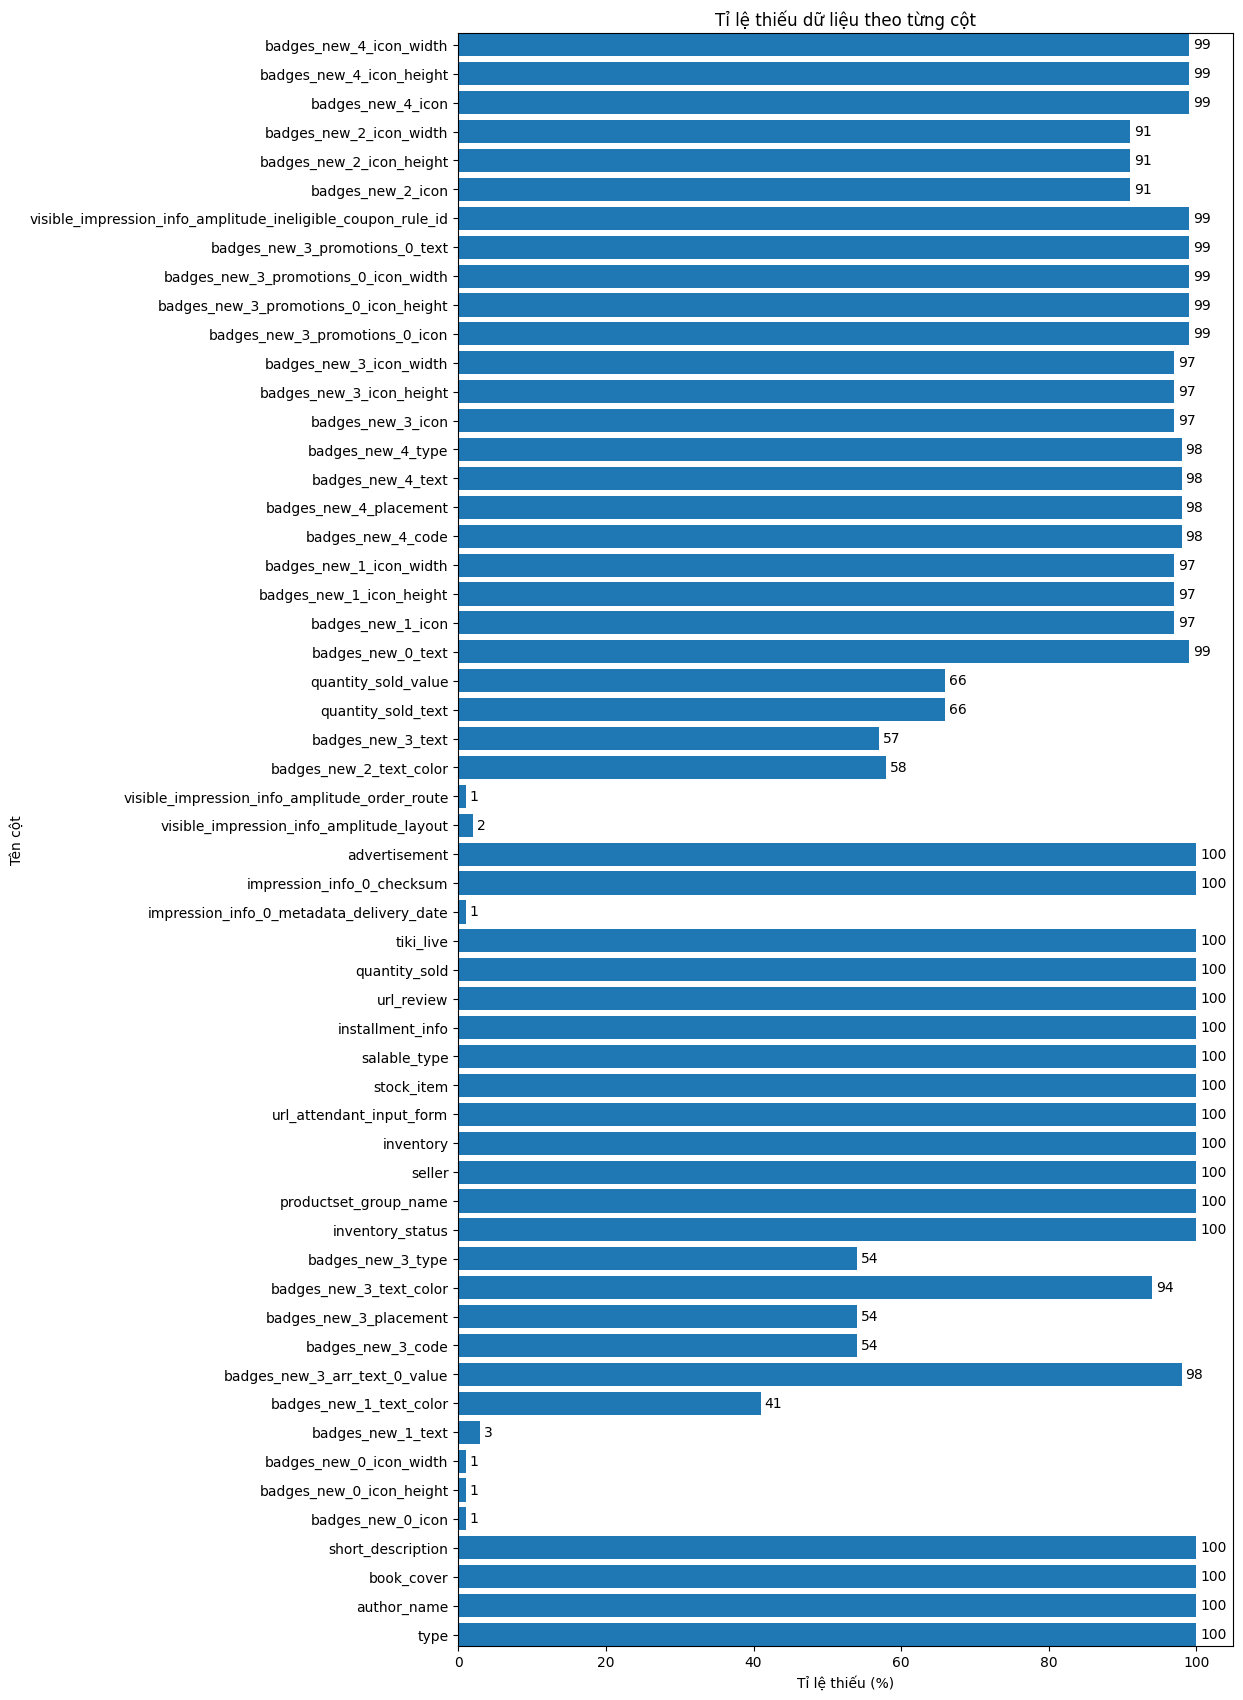

In [167]:
missing_ratio = (missing_summary / len(df)) * 100

plt.figure(figsize=(10, len(missing_ratio) * 0.3))
bars = plt.barh(missing_ratio.index, missing_ratio.values)

plt.xlabel("Tỉ lệ thiếu (%)")
plt.ylabel("Tên cột")
plt.title("Tỉ lệ thiếu dữ liệu theo từng cột")

for bar, val in zip(bars, missing_summary.values):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        str(val),
        va='center'
    )
plt.margins(y=0)
plt.subplots_adjust(top=0.98, bottom=0.02)
plt.show()

# ***CLEANING***

***Bước làm sạch dữ liệu***

Xử lý giá trị thiếu (missing values)

Nếu cột thiếu toàn bộ hoặc >95% thì drop.
Nếu cột quan trọng nhưng thiếu ít → thay thế (mean/median cho số, mode cho categorical).

In [168]:
name_map = {
    '[NEW 2026 TV Series] Smart Tivi Xiaomi TV A Pro 43 2026 - 43 Inch - Hàng Chính Hãng':'Xiaomi 43 Inch',
    'Smart Tivi LG AI 4K 55 Inch 55UA8450PSA- Hàng Chính Hãng':'LG 55 Inch',
    'Smart Tivi LG AI 4K 65 Inch 65UA8450PSA- Hàng Chính Hãng':'LG 65 Inch',
    'Google Tivi Xiaomi A 2026 4K 55 inch L55MB-ASEA - Hàng chính hãng':'Xiaomi 55 Inch',
    'Google Tivi Xiaomi A 2026 4K 43 inch L43MB-AUSEA - Hàng chính hãng':'Xiaomi 43 Inch',
    'Smart Tivi QLED Samsung 4K 55 inch QA55QE1DAKXXV - Hàng Chính Hãng':'Samsung 55 Inch',
    'Google Tivi TCL QLED Full HD 32 Inch 32S5K - Hàng chính hãng':'TCL 32 Inch',
    'Google Tivi TCL QLED 4K 43 Inch 43P7K - Hàng Chính Hãng':'TCL 43 Inch',
    'Google Tivi QLED TCL Full HD 43 inch 43S5K - Hàng chính hãng':'TCL 43 Inch',
    'Smart Tivi Samsung 4K 65 inch UA65DU7000KXXV - Hàng chính hãng':'Samsung 65 Inch',
    'Smart Tivi Samsung 4K 55 inch UA55DU7000KXXV - Hàng chính hãng':'Samsung 55 Inch',
    'Google Tivi LED TCL 4K 55 inch 55P755 Pro - Hàng Chính Hãng':'TCL 55 Inch',
    'Google Tivi TCL 4K 43 Inch 43P755 - Hàng Chính Hãng':'TCL 43 Inch',
    'Smart Tivi Xiaomi TV A43" FUD 2025 - 43 Inch - Hàng Chính Hãng, Bảo Hành 24 Tháng':'Xiaomi 43 Inch',
    'Tivi Android  LED Hisense 40 inch 40A4N - HÀNG CHÍNH HÃNG - CHỈ GIAO HCM':'Hisense 40 Inch',
    'Smart TV Full HD Coocaa 43 Inch 43S3U+ - Hàng Chính Hãng':'Coocaa 43 Inch',
    'Smart Tivi Samsung 4K 65 Inch UA65DU7700 - HÀNG CHÍNH HÃNG - CHỈ GIAO HCM':'Samsung 65 Inch',
    'Smart Tivi LG 4K 55 inch 55UT8050PSB - Hàng Chính Hãng':'LG 55 Inch',
    'Google Tivi Coocaa 4K 65 Inch 65Y73 - Hàng Chính Hãng - Chỉ Giao HCM':'Coocaa 65 Inch',
    '43S3U+ - Smart Tivi Coocaa 43S3U+ Full HD 43 inch - Hàng Chính Hãng - Chỉ Giao Hồ Chí Minh':'Coocaa 43 Inch',
    'K-75XR90 - Google Tivi Mini LED Sony 4K 75 inch K-75XR90 - Hàng Chính Hãng':'Sony 75 Inch',
    'K-75S30 - Google Tivi Sony 4K 75 inch K-75S30 - Hàng Chính Hãng':'Sony 75 Inch',
    'Google Tivi Sony 4K 50 inch K-50S30 Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'Sony 50 Inch',
    'Smart Tivi OLED LG 4K 55 inch OLED55B4PSA Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 55 Inch',
    'Smart TV HD Coocaa 32 Inch Wifi - Model 32S3U+ - Hàng Chính Hãng':'Coocaa 32 Inch',
    'Google Tivi LED Sony 4K 55 inch K-55S30 VN3 - Hàng Chính Hãng':'Sony 55 Inch',
    'Google Tivi Sony 4K 50 inch K-50S30 - Hàng Chính Hãng':'Sony 50 Inch',
    'QLED Tivi 4K Samsung 85Q60DA 85 inch Smart TV QA85Q60DA QA85Q60D 85Q60D - Hàng chính hãng - Chỉ giao HCM':'Samsung 85 Inch',
    'Smart QLED Tivi 4K Samsung 55Q60DA 55 inch QA55Q60DA QA55Q60D 55Q60D - Hàng chính hãng - Chỉ giao HCM':'Samsung 55 Inch',
    'Smart Tivi Samsung 4K 65 inch UA65DU8000 65DU8000 - Hàng chính hãng - Chỉ giao HCM':'Samsung 65 Inch',
    'Smart Tivi Oled LG 55A3PSA 4K 55 Inch - HÀNG CHÍNH HÃNG ( CHỈ GIAO HCM )':'LG 55 Inch',
    'Android TV K-Elec Full HD 43LK885V - Hàng nhập khẩu':'K-Elec 43 Inch',
    'Smart Tivi NanoCell LG 4K 55 Inch 55NANO76SQA [Hàng Chính Hãng]':'LG 55 Inch',
    'Tivi TCL 4K 55 inch 55P638 - Hàng chính hãng (Chỉ giao HCM)':'TCL 55 Inch',
    'Smart Tivi Coocaa HD 32 inch 32S3U':'Coocaa 32 Inch',
    'Smart Tivi Casper HD 32 inch 32HX6200':'Casper 32 Inch',
    'Tivi LED Sharp HD 32 inch 2T-C32BD1X':'Sharp 332 Inch',
    'Smart Tivi Cong QLED Samsung 4K 55 inch QA55Q8CNA':'Samsung 55 Inch',
    '[NEW 2026 TV Series] Smart Tivi Xiaomi TV A 43 2026 - 43 Inch - UHD 4K - Hàng Chính Hãng':'Xiaomi 43 Inch',
    'Smart Tivi Toshiba 65 inch 4K UHD 65E330NP, Giao Hàng Toàn Quốc - Hàng Chính Hãng':'Toshiba 65 Inch',
    '24P6300 - Google Tivi Xách Tay Di Động FHD 24 Inch Skyworth - Hàng Chính Hãng':'Skyworth 24 Inch',
    'TIVI LED SKYWORTH HD 32 INCH  32E5000G - HÀNG CHÍNH HÃNG - CHỈ GIAO HCM':'Skyworth 32 Inch',
    'Android Tivi LED Hisense 32 inch 32A4N trợ lý ảo Google Voice Control, bảo hành chính hãng 2 năm - Hàng Chính Hãng':'Hisense 32 Inch',
    'Smart Tivi Coocaa khung tranh QLED 4K 55 inch 55LN7000G - Hàng chính hãng':'Coocaa 55 Inch',
    'Google Tivi Xiaomi QLED 4K 85 inch L85MA-MAXEA -  HÀNG CHÍNH HÃNG - CHỈ GIAO HCM':'Xiaomi 85 Inch',
    'Smart Tivi OLED LG 4K 55 inch 55G4PSA Mẫu mới - HÀNG CHÍNH HÃNG - CHỈ GIAO HCM':'LG 55 Inch',
    'Android Tivi Aqua 43 inch AQT43K800UG - Hàng chính hãng - Bảo hành 1 đổi 1 trong 730 ngày đối với lỗi màn hình':'Aqua 43 Inch',
    'Smart Tivi QLED TOSHIBA 55 inch 55M450NP, Màn Hình Quantum Dot 4K UHD -  Giao Hàng Toàn Quốc - Hàng Chính Hãng':'Toshiba 55 Inch',
    'Smart Tivi TOSHIBA 55 inch 55E330NP, Màn Hình LED 4K UHD - Giao Hàng Toàn Quốc - Hàng Chính Hãng':'Toshiba 55 Inch',
    'Smart Tivi LG 4K 65 inch 65UT7350PSB - HÀNG CHÍNH HÃNG - CHỈ GIAO HCM':'LG 65 Inch',
    'Skyworth Google TV 2K FHD 24P6300 - Hàng chính hãng':'Skyworth 24 Inch',
    'Smart Tivi Skyworth 43E5000G 43 inch 43E5000G - Hàng chính hãng':'Skyworth 43 Inch',
    'Smart Tivi NanoCell LG 4K 50 inch 50NANO81TSA - hàng chính hãng - chỉ giao tại HCM':'LG 50 Inch',
    'K-85S30 - Google Tivi Sony 4K 85 inch K-85S30 - Hàng Chính Hãng':'Sony 85 Inch',
    'K-65XR70 - Google Tivi Mini LED Sony 4K 65 inch K-65XR70 - Hàng Chính Hãng':'Sony 65 Inch',
    'Smart Tivi NanoCell LG 4K 55 Inch 55NANO81TSA Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 55 Inch',
    'Smart Tivi LG 4K 43 inch 43UT8050PSB Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 43 Inch',
    'Smart Tivi NanoCell LG 4K 43 inch 43NANO81TSA Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 43 Inch',
    'Smart Tivi OLED LG 4K 65 inch OLED65C4PSA Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 65 Inch',
    'Google Tivi LED Sony 4K 43 inch K-43S30 VN3 - Hàng Chính Hãng':'Sony 43 Inch',
    'Google Tivi Sony 4K 65 inch KD-65X75K - Hàng chính hãng':'Sony 65 Inch',
    'Smart QLED Tivi 4K Samsung 75Q60DA 75 inch QA75Q60DA QA75Q60D 75Q60D - Hàng chính hãng - Chỉ giao HCM':'Samsung 75 Inch',
    'Smart Tivi QLED 4K Samsung 43Q60DA 43 inch Smart TV QA43Q60DA QA43Q60D 43Q60D - Hàng chính hãng - Chỉ giao HCM':'Samsung 43 Inch',
    'Smart Tivi Samsung 4K 85 inch UA85DU8000 85DU8000 - Hàng chính hãng - Chỉ giao HCM':'Samsung 85 Inch',
    'Smart Tivi Samsung 4K 55 inch UA55DU8000 55DU8000 - Hàng chính hãng - Chỉ giao HCM':'Samsung 55 Inch',
    'Google Tivi Sony 4K 75 inch KD.75X77L - Hàng chính hãng ':'Sony 75 Inch',
    'Smart Tivi LG 75UR7550PSC 4K 75 Inch - HÀNG CHÍNH HÃNG - CHỈ GIAO HCM ':'LG 75 Inch',
    'Android TV K-Elec HD 32LK885V - Hàng nhập khẩu':'K-Elec 32 Inch',
    'Tivi 32IN HÀNG CHÍNH HÃNG NHẬP KHẨU TỪ HÀN QUỐC':'TV 32 Inch',
    'Google Tivi TCL LED 4K 55 inch 55P638 - Hàng chính hãng( Chỉ giao tại HCM)':'TCL 55 Inch',
    'Google Tivi Coocaa 4K 55 Inch - Model 55Y72 - Hàng chính hãng':'Coocaa 55 Inch',
    'Tivi Casper 43 inch 43FG5200 - Hàng chính hãng':'Casper 43 Inch',
    'Google Tivi Mini LED Sony 4K 65 inch XR-65X95K - Model 2022':'Sony 65 Inch',
    'Google Tivi Sony 4K 43 inch KD-43X81DK - Model 2022':'Sony 43 Inch',
    'Google Tivi Sony 2K 32 inch KD-32W830K - Model 2022':'Sony 32 Inch',
    'ULED TIVI AKINO 55 inch TL-HU9 - android - Hàng Chính Hãng (Giao Hàng Toàn Quốc)':'Akino 55 Inch',
    'Android Tivi Aqua 4K 55 Inch LE55AQTS6UG - Hàng chính hãng (chỉ giao HCM)':'Aqua 55 Inch',
    'Smart Tivi OLED LG 4K 65 inch OLED65GXPTA':'LG 65 Inch',
    'Smart Tivi Toshiba 55 inch 4K UHD 55E330NP, Giao Hàng Toàn Quốc - Hàng Chính Hãng':'Toshiba 55 Inch',
    'Google Tivi Hisense QLED Hisense 55 inch 55Q6N Google Assistant Có Tiếng Việt, Bảo Hành 3 Năm - Hàng Chính Hãng':'Hisense 55 Inch',
    'Android Tivi LED Hisense 43 inch A4N Trợ Lý Ảo Google Voice Control, Bảo Hành 2 Năm - Hàng Chính Hãng':'Hisense 43 Inch',
    'Android Tivi LED Hisense 40 inch A4N trợ lý ảo Google Voice Control, bảo hành 2 năm - Hàng Chính Hãng':'Hisense 40 Inch',
    'Smart Tivi OLED LG 4K 65 Inch 65M4PSA - Hàng chính hãng':'LG 65 Inch',
    'Smart tivi 65 inch Qled 4K tivi Khung Tranh Google Frame tivi coocaa 65LN7000G - HÀNG CHÍNH HÃNG - CHỈ GIAO HCM':'Coocaa 65 Inch',
    'Android Tivi LED Hisense 43 inch 43A4N trợ lý ảo Google Voice Control, bảo hành 2 năm - HÀNG CHÍNH HÃNG':'Hisense 43 Inch',
    'Google Tivi Aqua QLED 4K 50 inch AQT50S800UX - Freeship toàn quốc - Bảo hành 1 đổi 1 trong 730 ngày đối với lỗi màn hình - Hàng chính hãng':'Aqua 50 Inch',
    'Smart Tivi NanoCell LG 4K 75 inch 75NANO81TSA - hàng chính hãng - chỉ giao tại HCM':'LG 75 Inch',
    'K-65S30 - Google Tivi Sony 4K 65 inch K-65S30 - Hàng Chính Hãng - Chỉ Giao Hồ Chí Minh':'Sony 65 Inch',
    'UA55DU8000 - Smart Tivi Samsung 4K 55 inch UA55DU8000 - Hàng Chính Hãng - Chỉ Giao Hồ Chí Minh':'Samsung 55 Inch',
    'K-75XR70 - Google Tivi Mini LED Sony 4K 75 inch K-75XR70 - Hàng Chính Hãng':'Sony 75 Inch',
    'Google Tivi Sony 4K 65 inch K-65S30 Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'Sony 65 Inch',
    'Smart Tivi LG 4K 50 inch 50UT8050PSB Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 50 Inch',
    'Smart Tivi NanoCell LG 4K 65 Inch 65NANO81TSA Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 65 Inch',
    'Smart Tivi OLED LG 4K 65 inch OLED65B4PSA Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 65 Inch',
    'Smart Tivi OLED LG 4K 55 inch OLED55C4PSA Mới 2024 - Hàng chính hãng - Giao HCM và 1 số tỉnh thành':'LG 55 Inch',
    'Smart Tivi Samsung Neo QLED 8K 65 Inch QA65QN800D QA65QN800DA 65QN800DA 65QN800D - Hàng chính hãng - Chỉ giao HCM':'Samsung 65 Inch',
    'Smart QLED Tivi 4K Samsung 65Q60DA 65 inch QA65Q60DA QA65Q60D 65Q60D - Hàng chính hãng - Chỉ giao HCM':'Samsung 65 Inch'

}

df['name'] = df['name'].map(name_map)

In [169]:
# Ngưỡng drop cột theo tỷ lệ thiếu
MISSING_COL_THRESHOLD = 0.95  # >95% thiếu thì drop

def strip_accents_lower(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

def to_num(x):
    """Bóc tách số từ chuỗi (ưu tiên VNĐ là số nguyên), lỗi -> NaN."""
    if pd.isna(x): return np.nan
    s = str(x)
    try:
        return float(s)
    except:
        pass
    s = re.sub(r"[^\d.]", "", s)
    if s.count(".") > 1:  # nghi ngờ dấu . là ngăn cách nghìn
        s = s.replace(".", "")
    try:
        return float(s) if s else np.nan
    except:
        return np.nan

print("Kích thước ban đầu:", df.shape)

Kích thước ban đầu: (100, 163)


In [170]:
def parse_price(x):
    """Giữ lại chữ số và chuyển về float; trống -> NaN."""
    if pd.isna(x):
        return np.nan
    s = re.sub(r"[^\d]", "", str(x))
    return float(s) if s else np.nan

def strip_accents_lower(s):
    """Chuẩn hóa text: bỏ dấu, lowercase, strip khoảng trắng."""
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

In [171]:
df_clean = df.copy()

In [172]:
# Drop cột có tỷ lệ thiếu > ngưỡng

null_ratio = df_clean.isna().mean()
drop_cols = list(null_ratio[null_ratio > MISSING_COL_THRESHOLD].index)
df_clean = df_clean.drop(columns=drop_cols)
print(f"Đã drop {len(drop_cols)} cột thiếu > {int(MISSING_COL_THRESHOLD*100)}%")
print("Sau drop cột:", df_clean.shape)

Đã drop 37 cột thiếu > 95%
Sau drop cột: (100, 126)


In [173]:
for key_col in ["id","name"]:
    if key_col in df_clean.columns:
        before = len(df_clean)
        df_clean = df_clean[df_clean[key_col].notna()]
        print(f"Loại {before-len(df_clean)} hàng thiếu '{key_col}'")

Loại 0 hàng thiếu 'id'
Loại 3 hàng thiếu 'name'


In [174]:
if "id" in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["id"])
    print("Drop duplicates theo 'id':", before - len(df_clean))
elif set(["name","brand_name"]).issubset(df_clean.columns):
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["name","brand_name"])
    print("Drop duplicates theo (name, brand_name):", before - len(df_clean))

print("Kích thước hiện tại:", df_clean.shape)

Drop duplicates theo 'id': 0
Kích thước hiện tại: (97, 126)


In [175]:
for col in ["price", "list_price"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(parse_price)
if set(["price","list_price"]).issubset(df_clean.columns):
    df_clean["discount_percent"] = np.where(
        df_clean["list_price"].gt(0) & df_clean["price"].notna(),
        (df_clean["list_price"] - df_clean["price"]) / df_clean["list_price"] * 100.0,
        np.nan
    )

In [176]:
def choose_best_column(frame, candidates):
    avail = [c for c in candidates if c in frame.columns]
    if not avail: return None
    nn = {c: frame[c].notna().sum() for c in avail}
    return max(nn, key=nn.get)

def coalesce(series_list):
    out = None
    for s in series_list:
        if s is None: 
            continue
        out = s if out is None else out.combine_first(s)
    return out

price_candidates      = ["price","final_price","sale_price","deal_price","current_price","best_price"]
list_price_candidates = ["list_price","original_price","price_before_discount","regular_price","old_price","reference_price"]
rate_candidates       = ["discount_rate","discount_percent","discountPercentage","discount_percent_api"]
abs_disc_candidates   = ["discount","discount_amount","price_discount","saved_amount"]

price_col      = choose_best_column(df_clean, price_candidates)
list_price_col = choose_best_column(df_clean, list_price_candidates)
rate_col       = choose_best_column(df_clean, rate_candidates)
abs_col        = choose_best_column(df_clean, abs_disc_candidates)

print("Cột phát hiện:")
print(" - price      :", price_col)
print(" - list_price :", list_price_col)
print(" - rate(%)    :", rate_col)
print(" - discount₫  :", abs_col)

# Ép kiểu số
if price_col:      df_clean["_price_fix"]      = pd.to_numeric(df_clean[price_col].map(to_num), errors="coerce")
if list_price_col: df_clean["_list_price_fix"] = pd.to_numeric(df_clean[list_price_col].map(to_num), errors="coerce")
if rate_col:       df_clean["_rate_fix"]       = pd.to_numeric(df_clean[rate_col].map(to_num), errors="coerce")
if abs_col:        df_clean["_disc_abs_fix"]   = pd.to_numeric(df_clean[abs_col].map(to_num), errors="coerce")

# Ưu tiên 1
dp1 = None
if price_col and list_price_col:
    lp = df_clean["_list_price_fix"]; pr = df_clean["_price_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp1 = (lp - pr) / lp * 100.0
        dp1 = dp1.where((lp > 0) & pr.notna())

# Ưu tiên 2
dp2 = None
if rate_col:
    r = df_clean["_rate_fix"]
    dp2 = pd.to_numeric(np.where(r <= 1.0, r * 100.0, r), errors="coerce")

# Ưu tiên 3
dp3 = None
if abs_col and list_price_col:
    lp = df_clean["_list_price_fix"]; da = df_clean["_disc_abs_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp3 = pd.to_numeric(da / lp * 100.0, errors="coerce").where(lp > 0)

# Gộp & làm sạch
dp = coalesce([dp1, pd.Series(dp2) if dp2 is not None else None, dp3])
if dp is not None:
    dp = pd.to_numeric(dp, errors="coerce").clip(-5, 100).round(2)
    df_clean["discount_percent"] = dp
else:
    df_clean["discount_percent"] = np.nan

print("Số dòng có discount_percent:", int(df_clean["discount_percent"].notna().sum()), "/", len(df_clean))


Cột phát hiện:
 - price      : price
 - list_price : list_price
 - rate(%)    : discount_rate
 - discount₫  : discount
Số dòng có discount_percent: 95 / 97


In [177]:
for col in ["name", "brand_name", "url_key", "url_path"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).map(strip_accents_lower)

In [178]:
if "brand_name" in df_clean.columns:
    df_clean["brand_clean"] = df_clean["brand_name"].str.replace(r"[^a-z0-9]+", " ", regex=True).str.strip()

df_clean[["price","list_price","discount_percent"]].head(3) if "price" in df_clean.columns else df_clean.head(3)

,price,list_price,discount_percent
0,7315000.0,0.0,0.0
1,9320000.0,0.0,30.0
2,11130000.0,0.0,30.0


Xử lý missing còn lại

Numeric: điền median

Categorical: điền mode

-> Chỉ áp dụng cho các cột KHÔNG phải khóa/id/text quan trọng

In [179]:
from pandas.api.types import is_numeric_dtype

In [180]:
# Cột không nên đụng tới khi fill (nếu tồn tại)
do_not_touch = set([c for c in ["id","sku","url_key","url_path"] if c in df_clean.columns])

num_cols = [c for c in df_clean.columns if is_numeric_dtype(df_clean[c]) and c not in do_not_touch]
cat_cols = [c for c in df_clean.columns if not is_numeric_dtype(df_clean[c]) and c not in do_not_touch]

In [181]:
# Fill numeric bằng median (nếu còn dữ liệu hợp lệ)
for c in num_cols:
    if df_clean[c].isna().any():
        if df_clean[c].notna().any():  # có ít nhất 1 giá trị không NaN
            med = df_clean[c].median(skipna=True)
            df_clean[c] = df_clean[c].fillna(med)
        else:
            print(f"Cột {c} toàn NaN, không thể tính median.")

# Fill categorical bằng mode (nếu có mode hợp lệ)
for c in cat_cols:
    if df_clean[c].isna().any():
        mode_vals = df_clean[c].mode(dropna=True)
        if not mode_vals.empty:
            df_clean[c] = df_clean[c].fillna(mode_vals.iloc[0])
        else:
            print(f"Cột {c} toàn NaN, không thể tính mode.")

print("Đã fill missing cho numeric & categorical (ổn định hơn).")

Đã fill missing cho numeric & categorical (ổn định hơn).


In [182]:
print("Kích thước cuối:", df_clean.shape)

# Thống kê cột còn thiếu sau fill
missing_left = df_clean.isna().sum()
missing_left = missing_left[missing_left > 0].sort_values(ascending=False)
print("Cột còn thiếu (top 15):")
print(missing_left.head(15))

# Sắp xếp cột: ưu tiên cột hay dùng lên đầu (nếu có)
preferred = [c for c in ["id","sku","name","brand_name","brand_clean","price","final_price","list_price","original_price","discount_percent","url_key","url_path"] if c in df_clean.columns]
rest = [c for c in df_clean.columns if c not in preferred]
df_clean = df_clean[preferred + rest]

Kích thước cuối: (97, 132)
Cột còn thiếu (top 15):
Series([], dtype: int64)


In [183]:
df = df_clean.copy()

In [184]:
print(df.head(10))

           id            sku             name brand_name brand_clean  \
0   278220734  2004742899164   xiaomi 43 inch     xiaomi      xiaomi   
1   278138258  5502954751332       lg 55 inch         lg          lg   
2   278138206  6189447443433       lg 65 inch         lg          lg   
3   278077419  1516540466887   xiaomi 55 inch     xiaomi      xiaomi   
4   278077327  2768528301218   xiaomi 43 inch     xiaomi      xiaomi   
5   278006178  9778243743809  samsung 55 inch    samsung     samsung   
6   277989480  8179351386544      tcl 32 inch        tcl         tcl   
7   277989405  9711018196961      tcl 43 inch        tcl         tcl   
10  277976029  7757181635905      tcl 43 inch        tcl         tcl   
11  277972475  4839814183874  samsung 65 inch    samsung     samsung   

         price  list_price  original_price  discount_percent  \
0    7315000.0         0.0         7350000               0.0   
1    9320000.0         0.0        13400000              30.0   
2   11130000.0 

Lọc các cột chỉ để lại các cột phục vụ cho đề tài

In [185]:
# chọn cột quan trọng
keep_cols = [
    c
    for c in [
        "id",
        "name",
        "brand_clean",
        "brand_name",
        "price",
        "list_price",
        "discount_percent",
        "image_path",
        "thumbnail_url",
        "rating_average",
        "seller_product_id",
        "quantity_sold_value"
    ]
    if c in df_clean.columns
]
df_core = df_clean[keep_cols].copy()

# --- tạo cột brand: ưu tiên brand_clean nếu có ---
if "brand_clean" in df_core.columns:
    df_core["brand"] = df_core["brand_clean"]
elif "brand_name" in df_core.columns:
    df_core["brand"] = df_core["brand_name"]

# --- bỏ hẳn brand_name & brand_clean để không trùng lặp ---
df_core = df_core.drop(
    columns=[c for c in ["brand_clean", "brand_name"] if c in df_core.columns]
)

# --- chuẩn hóa số cho price ---
if "price" in df_core.columns:
    df_core["price"] = pd.to_numeric(df_core["price"].map(to_num), errors="coerce")

# --- loại bỏ list_price và discount_percent nếu toàn NaN/0 ---
for col in ["list_price", "discount_percent"]:
    if col in df_core.columns:
        if df_core[col].isna().all() or (df_core[col].fillna(0) == 0).all():
            df_core = df_core.drop(columns=[col])
            print(f"Đã drop {col} vì toàn NaN/0")

# --- loại bản ghi không có image_path ---
if "image_path" in df_core.columns:
    before = len(df_core)
    df_core = df_core[df_core["image_path"].astype(str).str.strip().ne("")]
    print("Loại hàng thiếu image_path:", before - len(df_core))

# --- bỏ bản ghi trùng đường dẫn ảnh (nếu ảnh trùng file) ---
if "image_path" in df_core.columns:
    before = len(df_core)
    df_core = df_core.drop_duplicates(subset=["image_path"])
    print("Drop duplicates theo image_path:", before - len(df_core))
    
# --- drop trùng theo id nếu có ---
if "id" in df_core.columns:
    before = len(df_core)
    df_core = df_core.drop_duplicates(subset=["id"])
    print("Drop duplicates theo id:", before - len(df_core))

# --- sắp xếp cột chính ---
preferred = [
    c for c in ["id", "name", "brand", "image_path", "thumbnail_url"] if c in df_core.columns
]
rest = [c for c in df_core.columns if c not in preferred]
df_core = df_core[preferred + rest]

print("Kích thước sau rút gọn:", df_core.shape)
print(df_core.head(10))

Đã drop list_price vì toàn NaN/0
Loại hàng thiếu image_path: 0
Drop duplicates theo image_path: 0
Drop duplicates theo id: 0
Kích thước sau rút gọn: (97, 10)
           id             name    brand                       image_path  \
0   278220734   xiaomi 43 inch   xiaomi  images/tv/product_278220734.jpg   
1   278138258       lg 55 inch       lg  images/tv/product_278138258.jpg   
2   278138206       lg 65 inch       lg  images/tv/product_278138206.jpg   
3   278077419   xiaomi 55 inch   xiaomi  images/tv/product_278077419.jpg   
4   278077327   xiaomi 43 inch   xiaomi  images/tv/product_278077327.jpg   
5   278006178  samsung 55 inch  samsung  images/tv/product_278006178.jpg   
6   277989480      tcl 32 inch      tcl  images/tv/product_277989480.jpg   
7   277989405      tcl 43 inch      tcl  images/tv/product_277989405.jpg   
10  277976029      tcl 43 inch      tcl  images/tv/product_277976029.jpg   
11  277972475  samsung 65 inch  samsung  images/tv/product_277972475.jpg   

     

In [186]:
df = df_core.copy()

In [187]:
df.to_excel("../data_cleaned/tv.xlsx", index=False)